State vector:
 Statevector([ 0.25      -0.25j      ,  0.60355339+0.60355339j,
             -0.10355339-0.10355339j,  0.25      -0.25j      ],
            dims=(2, 2))


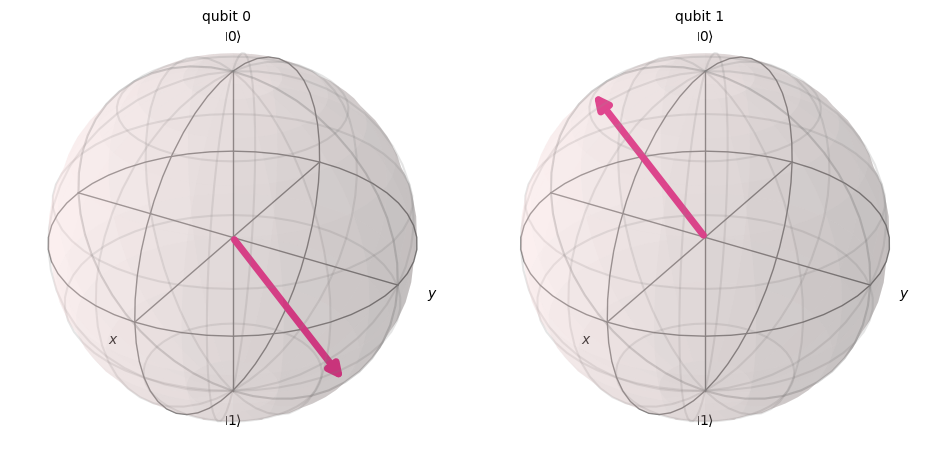

In [2]:
from qiskit.quantum_info import Statevector  #StateVector ci permette di lavorare con vettori di stato quantistici. In parole semplici, un vettore di stato rappresenta lo stato di un sistema quantistico.
#Esempii di vettori di stato includono |0>, |1>, |+>, |->

from qiskit.visualization import plot_bloch_multivector
from qiskit import QuantumCircuit, QuantumRegister
from math import pi


q = QuantumRegister(2) #Creiamo un registro quantistico con 2 qubit
qc = QuantumCircuit(q)

qc.u(pi/2, pi/4, pi/8, q[0])
qc.u(pi/2, pi/4, pi, q[1])
qc.h(0)
qc.x(0)

qc.h(1)


init_state = Statevector.from_instruction(qc)


print("State vector:\n", init_state)


plot_bloch_multivector(init_state)


In [3]:
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram

backend = BasicSimulator()


result = backend.run(qc, shots=2000).result()


counts = result.get_counts()
plot_histogram(counts)

No classical registers in circuit "circuit-44", counts will be empty.


StopIteration: 

**START**

In [8]:
from qiskit import *


qc = QuantumCircuit(1,1)  #Creiamo un circuito quantistico con 1 qubit e 1 bit classico



qc.draw()

q: 
     
c: 1/

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


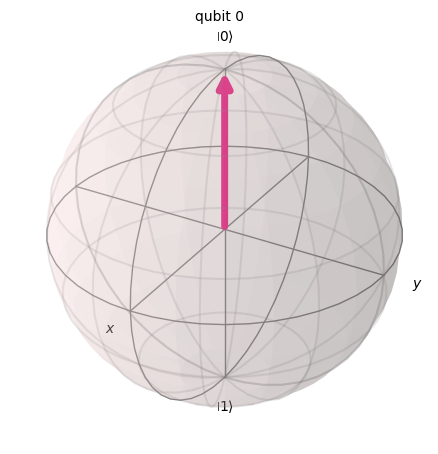

In [9]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

init_state = Statevector(qc);
print(init_state)

plot_bloch_multivector(init_state)

In [10]:
qc.h(0)                        # Apply a Hadamard to the q0 of qc
qc.draw()

┌───┐
  q: ┤ H ├
     └───┘
c: 1/═════

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


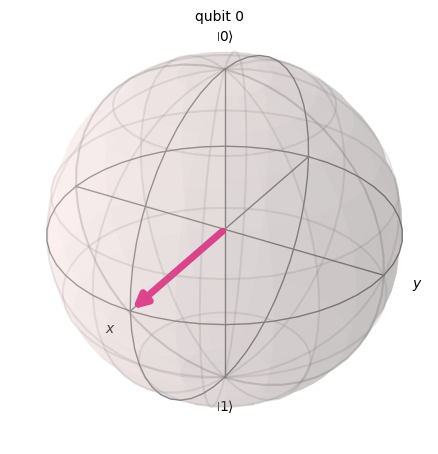

In [11]:
h_state = Statevector(qc);
print(h_state)

plot_bloch_multivector(h_state)

In [12]:
qc.measure(0, 0)
qc.draw()

┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0

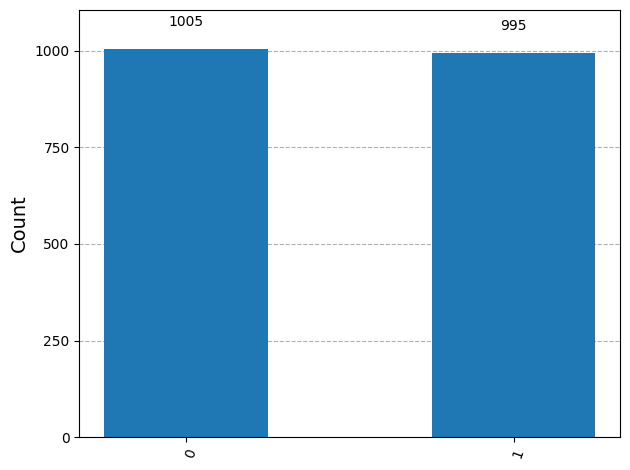

In [28]:
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram

backend = BasicSimulator()


result = backend.run(qc, shots=2000).result()


counts = result.get_counts()
plot_histogram(counts)

In [37]:
qc = QuantumCircuit(2)
qc.x(0)

print(Statevector(qc))


qc.draw(initial_state=True)

Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


┌───┐
q_0: |0>┤ X ├
        └───┘
q_1: |0>─────

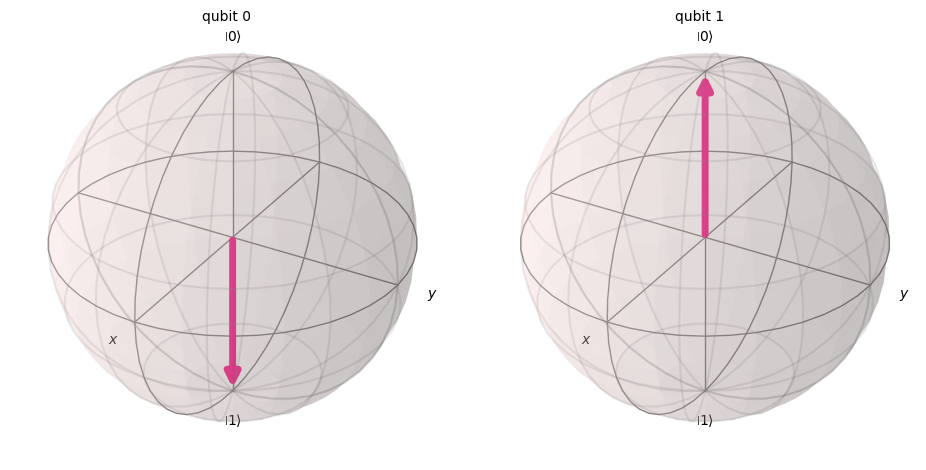

In [38]:
plot_bloch_multivector(qc)

In [60]:
qc.cx(0,1)
print(Statevector(qc))
qc.draw()

Statevector([0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


┌───┐                                                                 »
q_0: ┤ X ├──■────■────■────■────■────■────■────■────■────■────■────■────■──»
     └───┘┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐»
q_1: ─────┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├»
          └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘»
«                                                  
«q_0: ──■────■────■────■────■────■────■────■────■──
«     ┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐┌─┴─┐
«q_1: ┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├┤ X ├
«     └───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘└───┘

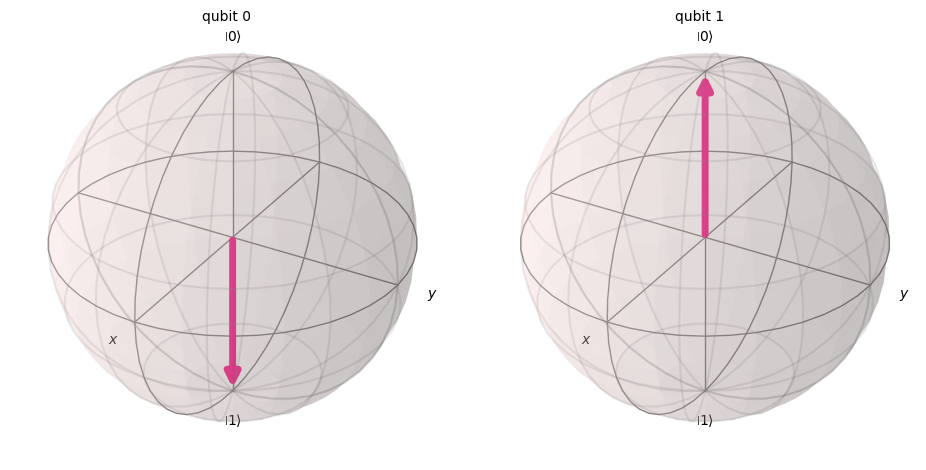

In [61]:
plot_bloch_multivector(qc)

In [66]:

qc_ha = QuantumCircuit(4,2)


qc_ha.x(0)
qc_ha.x(1)

qc_ha.barrier() #A cosa serve una barriera? Serve a separare visivamente le diverse sezioni del circuito quantistico, rendendo più chiara la lettura e la comprensione del circuito stesso.
#A livello funzionale, le barriere non influenzano l'esecuzione del circuito, ma possono essere utili per organizzare e strutturare il circuito in modo più leggibile.


qc_ha.cx(0,2)
qc_ha.cx(1,2)
qc_ha.ccx(0,1,3)

qc_ha.barrier()


qc_ha.measure(2,0)  #Misuriamo il qubit 2 e salviamo il risultato nel bit classico 0
qc_ha.measure(3,1)  #Misuriamo il qubit 3 e salviamo il risultato nel bit classico 1


print(qc_ha.draw(initial_state=True))

print("Valori dei bit classici:", qc_ha.clbits)

        ┌───┐ ░                 ░       
q_0: |0>┤ X ├─░───■─────────■───░───────
        ├───┤ ░   │         │   ░       
q_1: |0>┤ X ├─░───┼────■────■───░───────
        └───┘ ░ ┌─┴─┐┌─┴─┐  │   ░ ┌─┐   
q_2: |0>──────░─┤ X ├┤ X ├──┼───░─┤M├───
              ░ └───┘└───┘┌─┴─┐ ░ └╥┘┌─┐
q_3: |0>──────░───────────┤ X ├─░──╫─┤M├
              ░           └───┘ ░  ║ └╥┘
 c: 0 2/═══════════════════════════╩══╩═
                                   0  1 
Valori dei bit classici: [<Clbit register=(2, "c"), index=0>, <Clbit register=(2, "c"), index=1>]


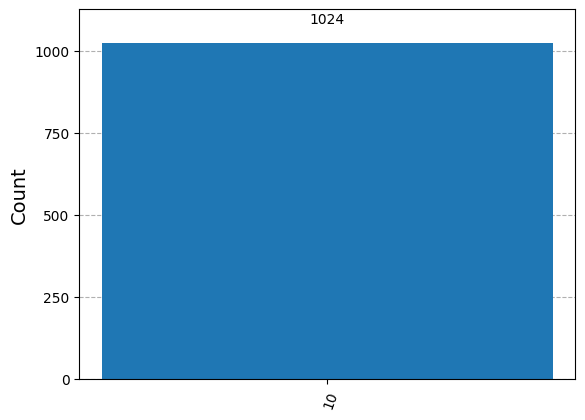

In [ ]:
backend = BasicSimulator()
result = backend.run(qc_ha).result()
counts = result.get_counts()
plot_histogram(counts)

/usr/local/lib/python3.10/dist-packages/qiskit/providers/fake_provider/generic_backend_v2.py:963: RuntimeWarning: Aer not found using BasicSimulator and no noise
  warnings.warn("Aer not found using BasicSimulator and no noise", RuntimeWarning)


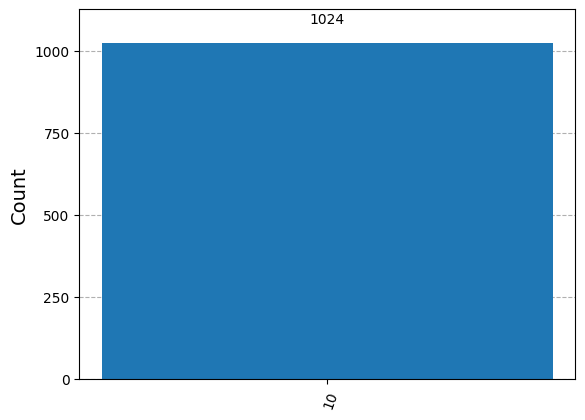

In [ ]:
from qiskit.providers.fake_provider import GenericBackendV2


backend = GenericBackendV2(num_qubits=4)


transpiled_circuit = transpile(qc_ha, backend)
result = backend.run(transpiled_circuit).result()

counts = result.get_counts()
plot_histogram(counts)

In [ ]:
from qiskit import *


gc = QuantumCircuit(2,2)


gc.h([0,1])

gc.barrier()


gc.cz(0,1)

gc.barrier()


gc.h([0,1])
gc.z([0,1])
gc.cz(0,1)
gc.h([0,1])

gc.barrier()


gc.measure([0,1], [0,1])


gc.draw()

┌───┐ ░     ░ ┌───┐┌───┐   ┌───┐ ░ ┌─┐   
q_0: ┤ H ├─░──■──░─┤ H ├┤ Z ├─■─┤ H ├─░─┤M├───
     ├───┤ ░  │  ░ ├───┤├───┤ │ ├───┤ ░ └╥┘┌─┐
q_1: ┤ H ├─░──■──░─┤ H ├┤ Z ├─■─┤ H ├─░──╫─┤M├
     └───┘ ░     ░ └───┘└───┘   └───┘ ░  ║ └╥┘
c: 2/════════════════════════════════════╩══╩═
                                         0  1

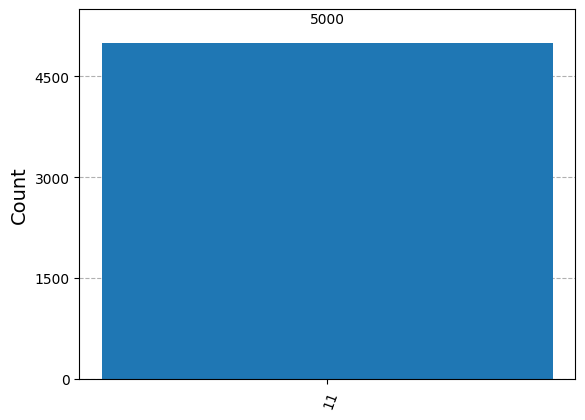

In [ ]:
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram


backend = BasicSimulator()
result = backend.run(gc, shots=5000).result()
counts = result.get_counts()
plot_histogram(counts)

In [ ]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator, Statevector, DensityMatrix

qc = QuantumCircuit(1)
qc.h(0)

print(Operator(qc)) # unitary
print(Statevector(qc))
print(DensityMatrix(qc))

Operator([[ 0.70710678+0.j,  0.70710678+0.j],
          [ 0.70710678+0.j, -0.70710678+0.j]],
         input_dims=(2,), output_dims=(2,))
Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))
DensityMatrix([[0.5+0.j, 0.5+0.j],
               [0.5+0.j, 0.5+0.j]],
              dims=(2,))


In [ ]:
from qiskit.quantum_info import Statevector
from numpy import sqrt

u = Statevector([1 / sqrt(2), 1 / sqrt(2)])
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
w = Statevector([1 / 3, 2 / 3])

print("State vectors u, v, and w have been defined.")

State vectors u, v, and w have been defined.


In [ ]:
display(u.draw("latex"))
display(v.draw("text"))

<IPython.core.display.Latex object>

[ 0.33333333+0.66666667j,-0.66666667+0.j        ]

In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import Aer

circ = QuantumCircuit(1)
circ.h(0)

simulator = Aer.get_backend('statevector_simulator')
result = simulator.run(circ).result()
sv = result.get_statevector(circ)
print(sv)

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


**RESTART**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi

In [ ]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, transpile
from qiskit.quantum_info import state_fidelity
from qiskit_aer import Aer

In [ ]:
backend = Aer.get_backend('unitary_simulator')

In [ ]:
q = QuantumRegister(1)

qc = QuantumCircuit(q)
qc.u(pi/2,pi/4,pi/8,q)
qc.draw()


┌────────────────┐
q4: ┤ U(π/2,π/4,π/8) ├
    └────────────────┘

In [ ]:
job = backend.run(transpile(qc, backend))
job.result().get_unitary(qc, decimals=3)

Operator([[ 0.707+0.j   , -0.653-0.271j],
          [ 0.5  +0.5j  ,  0.271+0.653j]],
         input_dims=(2,), output_dims=(2,))


In [ ]:

from qiskit.visualization import plot_histogram


qc = QuantumCircuit(2)

unitary_simulator = Aer.get_backend('unitary_simulator')
job = backend.run(transpile(qc, backend))
result = job.result()


unitary_matrix = result.get_unitary()

print("Unitary Matrix of the circuit:")

display(unitary_matrix.draw("latex"))

Unitary Matrix of the circuit:


<IPython.core.display.Latex object>

In [ ]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
from qiskit import QuantumCircuit, QuantumRegister
from math import pi
q = QuantumRegister(2)
qc = QuantumCircuit(q)
#qc.u(pi/2, pi/4, pi/8, q[0])
#qc.u(pi/2, pi/4, pi/8, q[1])
qc.h(0)
#qc.x(0)
qc.h(1)
init_state = Statevector.from_instruction(qc)
print("State vector:\n", init_state)
plot_bloch_multivector(init_state)
display(init_state.draw("latex"))

State vector:
 Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],
            dims=(2, 2))


<IPython.core.display.Latex object>

In [ ]:




from qiskit.visualization import plot_histogram


qc = QuantumCircuit(2)
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)


unitary_simulator = Aer.get_backend('unitary_simulator')
job = backend.run(transpile(qc, backend))
result = job.result()


unitary_matrix = result.get_unitary()

print("Unitary Matrix of the circuit:")
#print(unitary_matrix)
display(unitary_matrix.draw("text"))


QiskitError: 'No unitary for experiment "None"'

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector

import matplotlib.pyplot as plt


qc = QuantumCircuit(1, 1)
simulator = Aer.get_backend('statevector_simulator')

qc.h(0)

qc.rz(0.5, 0)  # Example phase shift angle (in radians)
qc.h(0)


#qc.measure(0, 0)
#qc.draw()



"""
from qiskit.providers.basic_provider import BasicSimulator
from qiskit.visualization import plot_histogram

backend = BasicSimulator()


result = backend.run(qc, shots=1000).result()


counts = result.get_counts()
plot_histogram(counts)
"""
result = simulator.run(qc).result()
sv = result.get_statevector(qc)
display(sv.draw("latex"))
plot_bloch_multivector(qc)



ModuleNotFoundError: No module named 'qiskit'

# Entanglement

In [86]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer

qc=QuantumCircuit(2)
#change the state of qubit 0
qc.x(0)

qc.h(0)
qc.cx(0,1)  #stiamo dicendo che il qubit 0 è il controllo e il qubit 1 è il target



simulator = Aer.get_backend('statevector_simulator')
result = simulator.run(qc).result()
sv = result.get_statevector(qc)
display(sv.draw("latex"))

simulator = Aer.get_backend('unitary_simulator')
job = simulator.run(transpile(qc, simulator))
result = job.result()
unitary_matrix = result.get_unitary()
print("Unitary Matrix of the circuit:")
display(unitary_matrix.draw("latex"))

simulator = Aer.get_backend('qasm_simulator')
qc.measure_all()
result = simulator.run(qc, shots=1000).result()
counts = result.get_counts()
print("Measurement results:",counts)


qc.draw()




<IPython.core.display.Latex object>

Unitary Matrix of the circuit:


<IPython.core.display.Latex object>

Measurement results: {'00': 491, '11': 509}


┌───┐┌───┐      ░ ┌─┐   
   q_0: ┤ X ├┤ H ├──■───░─┤M├───
        └───┘└───┘┌─┴─┐ ░ └╥┘┌─┐
   q_1: ──────────┤ X ├─░──╫─┤M├
                  └───┘ ░  ║ └╥┘
meas: 2/═══════════════════╩══╩═
                           0  1

# Quantum Teleportation Circuit

In [179]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.circuit.controlflow import IfElseOp
import numpy as np


def create_bell_pair(circuit, a, b):
    circuit.h(a)
    circuit.cx(a, b)


def teleport_quantum_state(statevector):
    """
    statevector: array di 2 ampiezze complex [α, β] con |α|² + |β|² = 1
                 generato da random_statevector(2), ad esempio
    """

    # Registri
    qr = QuantumRegister(3, name='q')
    crz = ClassicalRegister(1, name='crz')
    crx = ClassicalRegister(1, name='crx')

    teleportation_circuit = QuantumCircuit(qr, crz, crx)

    # ✅ 1) Inizializziamo q[0] nello statevector casuale
    teleportation_circuit.initialize(statevector, qr[0])

    # ✅ 2) Creiamo Bell pair tra q1 e q2
    create_bell_pair(teleportation_circuit, qr[1], qr[2])

    teleportation_circuit.barrier()

    # ✅ 3) Teleportation
    teleportation_circuit.cx(qr[0], qr[1])
    teleportation_circuit.h(qr[0])

    teleportation_circuit.barrier()

    # ✅ 4) Misure
    teleportation_circuit.measure(qr[0], crz[0])
    teleportation_circuit.measure(qr[1], crx[0])

    teleportation_circuit.barrier()

    # ✅ 5) Correzioni condizionali
    with teleportation_circuit.if_test((crx, 1)):
        teleportation_circuit.x(qr[2])

    with teleportation_circuit.if_test((crz, 1)):
        teleportation_circuit.z(qr[2])

    return teleportation_circuit


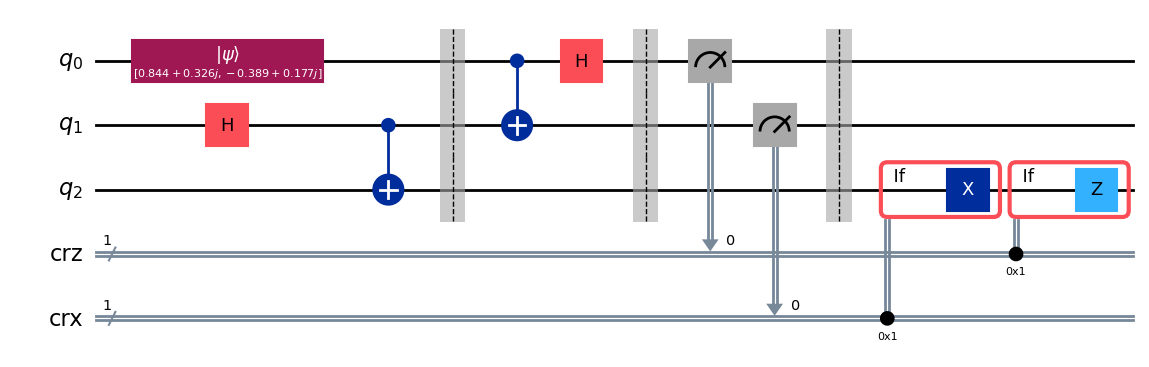

In [188]:
from qiskit.quantum_info import random_statevector

sv = random_statevector(2)   # stato qubit singolo
qc = teleport_quantum_state(sv)
qc.draw("mpl")

